In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 78
0,0,0,0,0,2.798293,0.769563,-0.528015,1.951881,-0.431077,-0.641827,...,0,0,0,1,0,0,2.753333,599.0,612.000000,13.000000
1,1,1,1,1,0.055436,-0.361432,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.600000,530.0,613.000000,83.000000
2,2,2,2,2,0.782458,0.017999,-0.528015,0.600491,-0.431077,-0.641827,...,0,0,0,1,0,0,3.500000,595.0,610.000000,15.000000
3,3,4,4,4,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.520000,520.0,612.000000,92.000000
4,4,5,5,5,0.055436,0.280681,-0.528015,1.958217,-0.431077,-0.641827,...,0,0,0,1,0,0,2.660000,590.0,612.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,214,214,214,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,570.0,605.000000,35.000000
213,213,215,215,215,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,562.0,605.000000,43.000000
214,214,216,216,216,-0.580709,-0.667895,-0.070987,-0.304661,-0.316033,-0.641827,...,0,0,0,0,0,0,5.433333,549.0,589.666667,40.666667
215,215,217,217,217,-0.423738,-0.631411,-0.201566,-0.304661,-0.085945,-0.600008,...,0,0,0,0,0,0,2.000000,523.0,597.000000,74.000000


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

In [4]:
EPSILON = 1e-10


def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)

## D - Optimizing diameter model


### 1D. Extra Trees

In [60]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:34<00:00, 18.94s/it]

0.33404040404040397 1 10 4


In [9]:
ET_regr = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=10,
                                            random_state=4)
            
ET_regr.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, ET_Y_pred_d)
print(r2)

0.766679315606245


### 2D. Decision Tree 

In [62]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:17<00:00,  6.83s/it]

0.33232323232323224 20 16 28


In [11]:
DT_regr = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
            
DT_regr.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, DT_Y_pred_d)
print(r2)

0.722382325359581


### 3D. Random Forest

In [63]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [17:08<00:00, 34.27s/it]

0.38906493506493495 16 3 11


In [12]:
RF_regr = RandomForestRegressor(max_depth=16, 
                                            n_estimators=3, 
                                            max_features=11,
                                            random_state=45)
RF_regr.fit(X_train_d, np.ravel(Y_train_d))
RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, RF_Y_pred_d)
print(r2)

0.663770020539644


### 4D. K Neighbors

In [64]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  2.02it/s]

0.44207070707070706 2 2


In [13]:
KNN_reg_d = KNeighborsRegressor(n_neighbors=2, 
                                      p=2).fit(X_train_d, np.ravel(Y_train_d))

KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

r2 = r2_score(Y_test_d, KNN_Y_pred_d)
print(r2)

0.5486730913035576


## 5. GBM

In [17]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_d, np.ravel(Y_train_d))
            
GB_Y_pred_d = GB_regr.predict(X_test_d)
            
GB_mae = mean_absolute_error(Y_test_d, GB_Y_pred_d)

r2=r2_score(Y_test_d, GB_Y_pred_d)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 0.459 R2=  0.5096902415691975


   ### 6. Bagging

In [28]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_d, np.ravel(Y_train_d))

B_Y_pred = B_regr.predict(X_test_d)
           
B_mae = mean_absolute_error(Y_test_d, B_Y_pred)
r2 = r2_score(Y_test_d, B_Y_pred)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 0.57 r2 =  0.4570859429217875


### Saving Decision Tree model

In [5]:
DT_regr_d = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
joblib.dump(DT_regr_d, "./model_SO_diameter_DecisionTree.joblib")

['./model_SO_diameter_DecisionTree.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [27]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:38<00:00, 19.09s/it]

11.464646460606067 1 19 10


In [29]:
ET_regr_e = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=19,
                                            random_state=10)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, ET_Y_pred_e)
print(r2)

0.8381365814624766


### 2E. Decision Trees

In [28]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:48<00:00,  5.81s/it]

11.7979797926407 12 16 66


In [35]:
DT_regr_e = DecisionTreeRegressor(max_depth=12,
                                max_features=16,
                                random_state=66)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, DT_Y_pred_e)
print(r2)

0.8271874293678887


### 3E. Random Forest

In [29]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [16:31<00:00, 33.03s/it]

15.066370349380778 14 14 9


In [36]:
RF_regr_e = RandomForestRegressor(max_depth=14, 
                                            n_estimators=14, 
                                            max_features=9,
                                            random_state=45)
RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, RF_Y_pred_e)

print(r2)

0.8167712066821444


### 4E. K Neighbors

In [30]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:18<00:00,  2.07it/s]

15.676767672727278 1 4


In [38]:
KNN_reg_e = KNeighborsRegressor(n_neighbors=1, 
                                      p=4).fit(X_train_e, np.ravel(Y_train_e))

KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

r2 = r2_score(Y_test_e, KNN_Y_pred_e)
print(r2)

0.7524015223029344


In [40]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_e, np.ravel(Y_train_e))

B_Y_pred_e = B_regr.predict(X_test_e)
           
B_mae = mean_absolute_error(Y_test_e, B_Y_pred_e)
r2 = r2_score(Y_test_e, B_Y_pred_e)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 21.037 r2 =  0.6166892251975135


In [42]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_e))
            
GB_Y_pred_e = GB_regr.predict(X_test_e)
            
GB_mae = mean_absolute_error(Y_test_e, GB_Y_pred_e)

r2=r2_score(Y_test_e, GB_Y_pred_e)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 18.877 R2=  0.6917627155961734


### Saving Extra Trees model

In [55]:
ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=19,     
                            random_state=10).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [14:53<00:00, 30.82s/it]

21.772727272727273 2 25 11


In [44]:
ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=25,
                                            random_state=11)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, ET_Y_pred_a)
r2

0.7319861927886339

### 2A. Decision Trees


In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:22<00:00,  6.99s/it]

20.595959593939398 20 20 12


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [6]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [18:57<00:00, 37.92s/it]

23.743265995033656 19 12 11


In [46]:
RF_regr_a = RandomForestRegressor(max_depth=19, 
                                            n_estimators=12, 
                                            max_features=11,
                                            random_state=45)
RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, RF_Y_pred_a)
r2

0.6960834051923627

### 4A. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:19<00:00,  1.98it/s]

25.05050505151515 1 1


In [47]:
KNN_reg_a = KNeighborsRegressor(n_neighbors=1, 
                                      p=1).fit(X_train_a, np.ravel(Y_train_a))

KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

r2 = r2_score(Y_test_a, KNN_Y_pred_a)
r2

0.5674094372015888

In [48]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_a))
            
GB_Y_pred_a = GB_regr.predict(X_test_a)
            
GB_mae = mean_absolute_error(Y_test_a, GB_Y_pred_a)

r2=r2_score(Y_test_a, GB_Y_pred_a)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 28.002 R2=  0.5099405451415844


In [55]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=22),
                                      n_estimators=10,
                                      random_state=20)
B_regr.fit(X_train_a, np.ravel(Y_train_a))

B_Y_pred_a = B_regr.predict(X_test_a)
           
B_mae = mean_absolute_error(Y_test_a, B_Y_pred_a)
r2 = r2_score(Y_test_a, B_Y_pred_a)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 30.876 r2 =  0.4769719057990063


### Saving model

In [56]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12)
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

joblib.dump(DT_regr_a, "./model_SO_abs_DecisionTree.joblib")

['./model_SO_abs_DecisionTree.joblib']

## Analyzing

In [27]:
DT_regr_d = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d).reshape(33,1)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rae = np.round(rae(Y_test_d, DT_Y_pred_d), 3)

from tabulate import tabulate

d = [ ["Diameter", D_rae]]

print(tabulate(d, headers=["Outputs", "Relative absolute error"]))

Outputs      Relative absolute error
---------  -------------------------
Diameter                       0.428


/home/anhhaokudo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [8]:
## Diameter
from numpy import std

DT_regr_d = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_rae = np.round(rae(Y_test_d, DT_Y_pred_d.reshape(33,1)), 3)
D_std = std(DT_Y_pred_d)


## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=19,     
                            random_state=10).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_rae = np.round(rae(Y_test_e, ET_Y_pred_e.reshape(33,1)), 3)
E_std = std(ET_Y_pred_e)



### Absorption

DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
A_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
A_rae = np.round(rae(Y_test_a, DT_Y_pred_a.reshape(33,1)), 3)
A_std = std(DT_Y_pred_a)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_rae, D_std],
     ["Absorption", A_r_2, A_mae, A_rae, A_std],
     ["Emission", E_r_2, E_mae, E_rae, E_std]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Relative absolute error", "Standard Deviation"] ))

Outputs           R2    Mean absolute error    Relative absolute error    Standard Deviation
----------  --------  ---------------------  -------------------------  --------------------
Diameter    0.722382               0.332323                      0.428                0.8662
Absorption  0.715759              20.596                         0.458               59.4688
Emission    0.838137              11.4646                        0.33                53.0974


/home/anhhaokudo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/anhhaokudo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/anhhaokudo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [29]:
from numpy import std, absolute, mean

def mad(data):
    mad = mean(absolute(data - mean(data)))
    return mad 


In [27]:
def interval(data, response, confidence):
    MAD = mean(absolute(data - mean(data)))
    lower, upper = response - confidence*MAD, response + confidence*MAD 
    return print("lower: ", lower, "; prediction: ", response, "; upper: ", upper, "; MAD: ", MAD)

In [31]:
interval(ET_Y_pred_e, ET_Y_pred_e[0], 1.6)

lower:  513.0356289805877 ; prediction:  576.3333333 ; upper:  639.6310376194124 ; MAD:  39.561065199632694


In [42]:

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=19,     
                            random_state=10).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
stdev = np.std(ET_Y_pred_e)
# 90% confidence
interval = 1.6 * stdev
lower, upper = ET_Y_pred_e[0] - interval, ET_Y_pred_e[0] + interval

print(lower, ET_Y_pred_e[0], upper)

491.3774924134211 576.3333333 661.289174186579


In [32]:
interval(DT_Y_pred_d, DT_Y_pred_d[0], 1.6)

lower:  0.6910951943679218 ; prediction:  1.7333333333333334 ; upper:  2.7755714722987452 ; MAD:  0.6513988368533823


In [34]:
DT_regr_d = DecisionTreeRegressor(max_depth=20,
                                max_features=16,
                                random_state=28)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d)

stdev = np.std(DT_Y_pred_d)

# 90% confidence
interval = 1.96 * stdev
lower, upper = DT_Y_pred_d[0] - interval, DT_Y_pred_d[0] + interval

print(stdev, lower, DT_Y_pred_d[0], upper)

0.8661999991495503 0.035581335000214986 1.7333333333333334 3.431085331666452


In [47]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)
stdev = np.std(DT_Y_pred_a)

# 90% confidence
interval = 1.6 * stdev
lower, upper = DT_Y_pred_a[0] - interval, DT_Y_pred_a[0] + interval

print(stdev, lower, DT_Y_pred_a[0], upper)

59.46877543401223 316.84995930558046 412.0 507.15004069441954


InvalidIndexError: (slice(None, None, None), None)

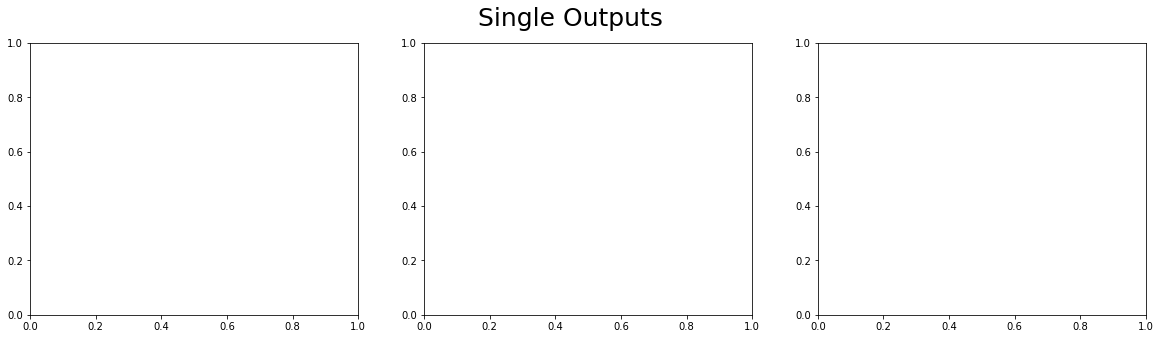

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, np.ravel(DT_Y_pred_d),'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, DT_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

In [8]:
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [9]:
err_down, err_up = pred_ints(DT_regr_a, X_test_a, percentile=90)


AttributeError: 'DecisionTreeRegressor' object has no attribute 'estimators_'

## Feature importance

### For diameter prediction

In [12]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('temp_c', 0.17115585620335333),
 ('in_amount_mmol', 0.13468545990339692),
 ('time_min', 0.13355474890232497),
 ('x7_zinc iodide', 0.07101466797367292),
 ('x5_dioctylamine', 0.06621019240471337),
 ('p_amount_mmol', 0.06536590068675731),
 ('x4_myristic acid', 0.0558952481080459),
 ('x0_indium acetate', 0.04684126669635279),
 ('acid_amount_mmol', 0.0304112532249981),
 ('total_volume_ml', 0.02505099100338304),
 ('other_amount_mmol', 0.021525020788561434),
 ('amine_amount_mmol', 0.020373308484199062),
 ('x6_None', 0.018212211879927515),
 ('x8_water', 0.016233610571304073),
 ('x0_chloroindium oxalate', 0.015303305170894756),
 ('x7_None', 0.015199083501020554),
 ('x3_None', 0.01422064443676377),
 ('x4_oleic acid', 0.013840602201838416),
 ('x1_tris(diethylamino)phosphine', 0.012524802135000913),
 ('x7_zinc bromide', 0.009957332531833852),
 ('x4_stearic acid', 0.008792469419095415),
 ('zinc_amount_mmol', 0.0072486396599350175),
 ('x1_phosphine gas', 0.007146992373895668),
 ('x8_copper bromide

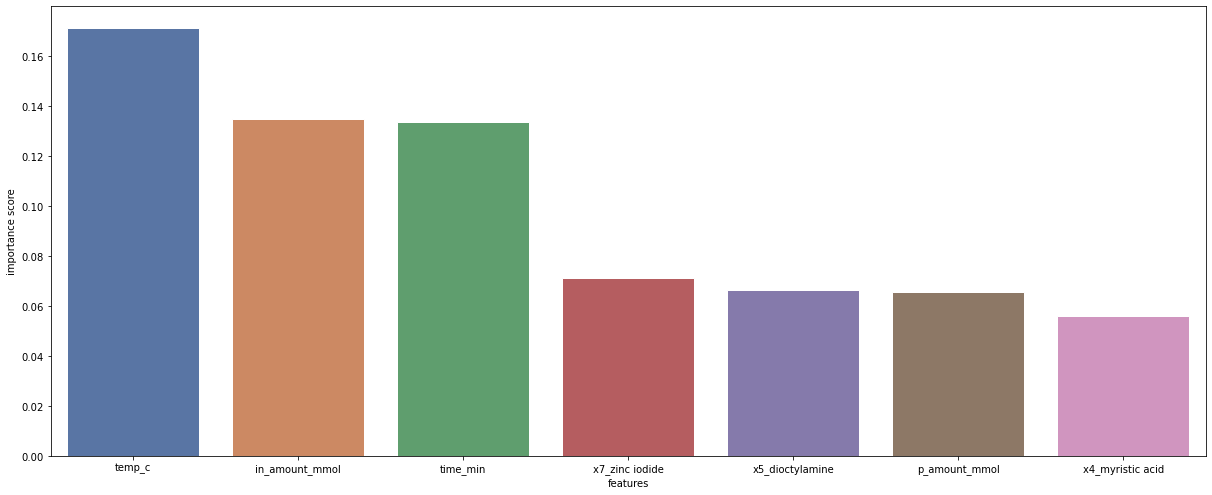

In [13]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [14]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x7_None', 0.14971628146089888),
 ('x0_indium oxalate', 0.11635116977876782),
 ('time_min', 0.10622227690585892),
 ('temp_c', 0.10591548312275978),
 ('x7_zinc iodide', 0.08309065786184468),
 ('x0_indium chloride', 0.07286107842374984),
 ('total_volume_ml', 0.037688035517084724),
 ('x1_phosphine gas', 0.03762058546484096),
 ('x7_zinc oleate', 0.03567404522182629),
 ('other_amount_mmol', 0.03563128809048837),
 ('in_amount_mmol', 0.029260170543899518),
 ('x7_zinc bromide', 0.025157258792322324),
 ('x3_None', 0.02480400023861778),
 ('x4_None', 0.02208329873378935),
 ('x5_dioctylamine', 0.016932496785663276),
 ('acid_amount_mmol', 0.01690420028341343),
 ('x1_white phosphorus', 0.014194439316321302),
 ('x0_indium bromide', 0.011765868416090246),
 ('p_amount_mmol', 0.009317873357110006),
 ('TOP_amount_mmol', 0.007694884946928168),
 ('x4_lauric acid', 0.005549274401949622),
 ('x8_None', 0.005126392434083934),
 ('sol_amount_ml', 0.004495168820410586),
 ('x2_octadecene', 0.0040412340577390665)

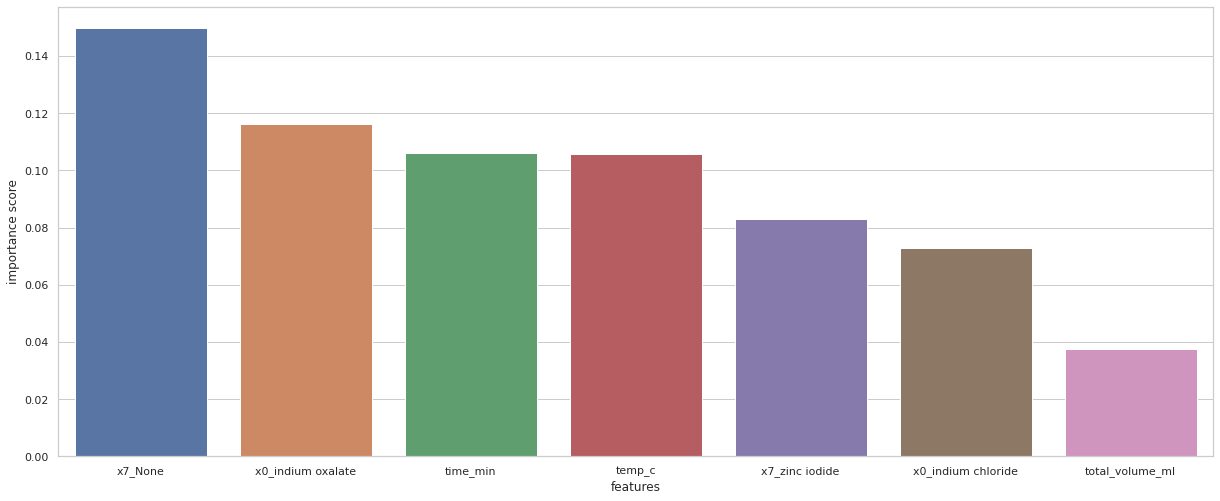

In [15]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [18]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = DT_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.2197705845090209),
 ('time_min', 0.14861232814590902),
 ('x7_None', 0.09849710216892996),
 ('amine_amount_mmol', 0.0858852953673919),
 ('total_volume_ml', 0.07233345402138885),
 ('TOP_amount_mmol', 0.07109420883009378),
 ('x1_phosphine gas', 0.05891206796682794),
 ('x7_zinc iodide', 0.03746051309755293),
 ('x8_water', 0.034318177872038086),
 ('acid_amount_mmol', 0.02603300508947207),
 ('p_amount_mmol', 0.02098466258492522),
 ('x7_zinc chloride', 0.020344198969800435),
 ('x5_None', 0.015394351654261793),
 ('other_amount_mmol', 0.013926791047683594),
 ('x7_zinc bromide', 0.013366648584885725),
 ('x4_lauric acid', 0.012647803374373634),
 ('x0_indium chloride', 0.011207738505694315),
 ('x4_stearic acid', 0.00846879917214322),
 ('in_amount_mmol', 0.008174599777625944),
 ('x3_trioctylphosphine', 0.007182732083198252),
 ('x0_indium iodide', 0.0044419972903610395),
 ('sol_amount_ml', 0.0041175291495416004),
 ('zinc_amount_mmol', 0.001882284230793519),
 ('x1_sodium phosphide', 0.0

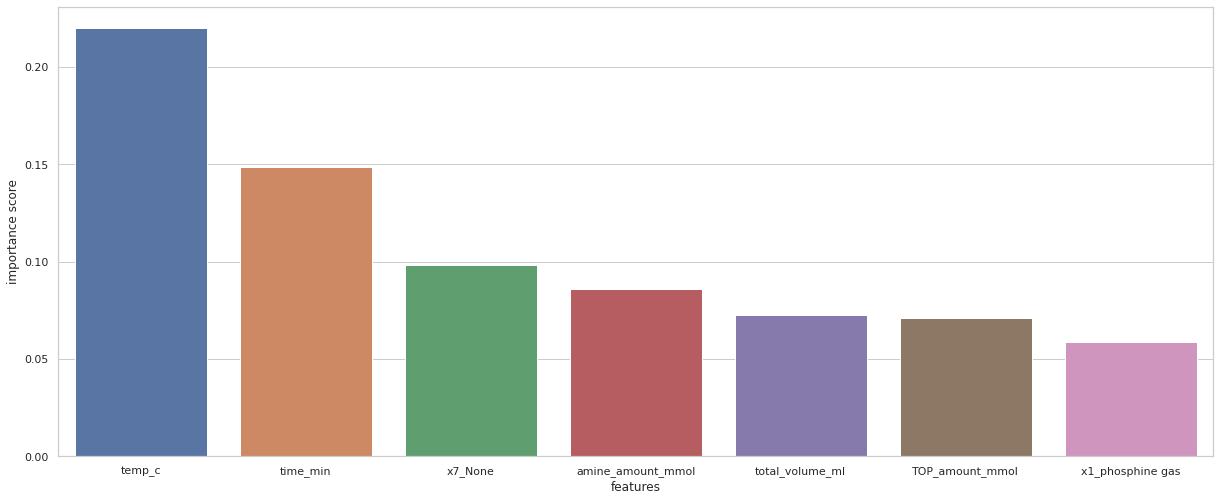

In [19]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [49]:
importance_dict_a

{'in_amount_mmol': 0.008174599777625944,
 'p_amount_mmol': 0.02098466258492522,
 'sol_amount_ml': 0.0041175291495416004,
 'TOP_amount_mmol': 0.07109420883009378,
 'acid_amount_mmol': 0.02603300508947207,
 'amine_amount_mmol': 0.0858852953673919,
 'thiol_amount_mmol': 0.0,
 'zinc_amount_mmol': 0.001882284230793519,
 'other_amount_mmol': 0.013926791047683594,
 'total_volume_ml': 0.07233345402138885,
 'temp_c': 0.2197705845090209,
 'time_min': 0.14861232814590902,
 'x0_chloroindium oxalate': 0.0010142211310188397,
 'x0_indium acetate': 3.975746833593852e-05,
 'x0_indium bromide': 6.744946138633628e-05,
 'x0_indium chloride': 0.011207738505694315,
 'x0_indium iodide': 0.0044419972903610395,
 'x0_indium myristate': 3.2455076192602868e-06,
 'x0_indium oxalate': 0.0,
 'x0_indium palmitate': 0.0,
 'x0_indium trifluoroacetate': 0.0,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphine gas': 0.05891206796682794,
 'x1_phosphorus trichloride

### Combine


In [24]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [40]:
sorted_d 

[('TOP_amount_mmol', 0.0024228303264090373),
 ('acid_amount_mmol', 0.0304112532249981),
 ('amine_amount_mmol', 0.020373308484199062),
 ('in_amount_mmol', 0.13468545990339692),
 ('other_amount_mmol', 0.021525020788561434),
 ('p_amount_mmol', 0.06536590068675731),
 ('sol_amount_ml', 0.0012206950358816273),
 ('temp_c', 0.17115585620335333),
 ('thiol_amount_mmol', 0.0),
 ('time_min', 0.13355474890232497),
 ('total_volume_ml', 0.02505099100338304),
 ('x0_chloroindium oxalate', 0.015303305170894756),
 ('x0_indium acetate', 0.04684126669635279),
 ('x0_indium bromide', 0.0001166107956815326),
 ('x0_indium chloride', 0.00023906112889393534),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium oxalate', 0.0),
 ('x0_indium palmitate', 0.0),
 ('x0_indium trifluoroacetate', 0.0),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 2.9152698920377968e-05),
 ('x1_phosphine gas', 0.007146992373895668),
 ('x1_phosphorus trichloride', 0.0),
 (

In [50]:
combined_importance = dict()

In [51]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'TOP_amount_mmol': 0.08121192410343099,
 'acid_amount_mmol': 0.0733484585978836,
 'amine_amount_mmol': 0.10920840274798244,
 'in_amount_mmol': 0.1721202302249224,
 'other_amount_mmol': 0.0710830999267334,
 'p_amount_mmol': 0.09566843662879254,
 'sol_amount_ml': 0.009833393005833814,
 'temp_c': 0.496841923835134,
 'thiol_amount_mmol': 0.0,
 'time_min': 0.3883893539540929,
 'total_volume_ml': 0.1350724805418566,
 'x0_chloroindium oxalate': 0.016317526301913597,
 'x0_indium acetate': 0.050768324381677325,
 'x0_indium bromide': 0.011949928673158115,
 'x0_indium chloride': 0.08430787805833809,
 'x0_indium iodide': 0.0044419972903610395,
 'x0_indium myristate': 3.2455076192602868e-06,
 'x0_indium oxalate': 0.11635116977876782,
 'x0_indium palmitate': 0.0,
 'x0_indium trifluoroacetate': 0.0,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 2.9152698920377968e-05,
 'x1_phosphine gas': 0.10367964580556457,
 'x1_phosphorus trichloride': 0.0,
 'x1_sodium 

In [55]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('temp_c', 0.496841923835134),
 ('time_min', 0.3883893539540929),
 ('x7_None', 0.26341246713084937),
 ('x7_zinc iodide', 0.19156583893307053),
 ('in_amount_mmol', 0.1721202302249224),
 ('total_volume_ml', 0.1350724805418566),
 ('x0_indium oxalate', 0.11635116977876782),
 ('amine_amount_mmol', 0.10920840274798244),
 ('x1_phosphine gas', 0.10367964580556457),
 ('p_amount_mmol', 0.09566843662879254),
 ('x0_indium chloride', 0.08430787805833809),
 ('x5_dioctylamine', 0.08324086579585928),
 ('TOP_amount_mmol', 0.08121192410343099),
 ('acid_amount_mmol', 0.0733484585978836),
 ('other_amount_mmol', 0.0710830999267334),
 ('x4_myristic acid', 0.05611973158861203),
 ('x0_indium acetate', 0.050768324381677325),
 ('x8_water', 0.050551788443342155),
 ('x7_zinc bromide', 0.04848123990904191),
 ('x3_None', 0.03902464467538155),
 ('x7_zinc oleate', 0.03567404522182629),
 ('x4_None', 0.02263450068930246),
 ('x7_zinc chloride', 0.022433279645367718),
 ('x6_None', 0.020945461639167957),
 ('x5_None', 0.0

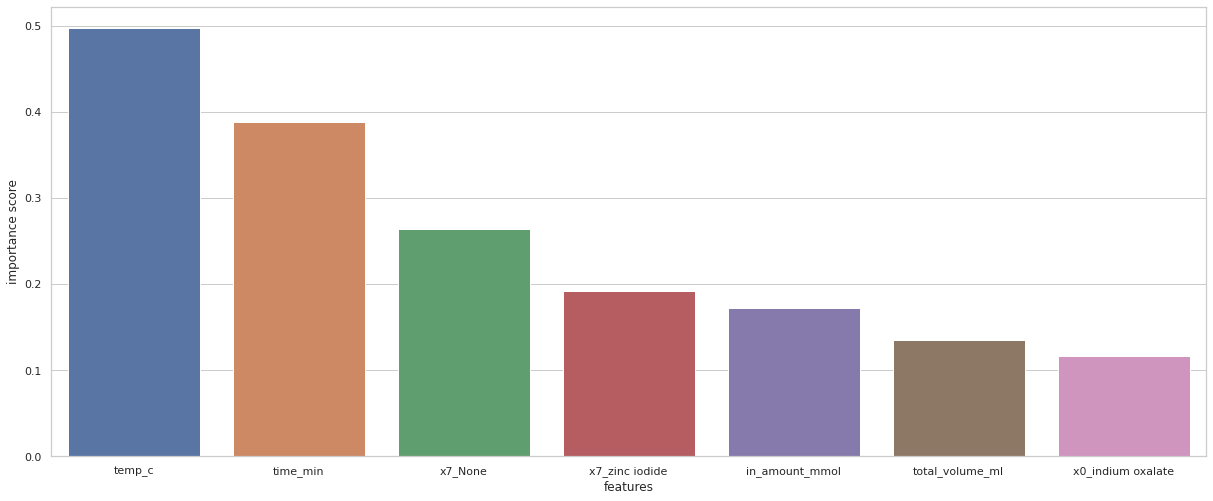

In [56]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)

## Correlation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
df["MEDV"] = x.target
X_cor = df.drop("MEDV",1)   #Feature Matrix
y_cor = df["MEDV"]          #Target Variable
df.head()